In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df.shape

(100, 4)

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [11]:
import matplotlib.pyplot as plt


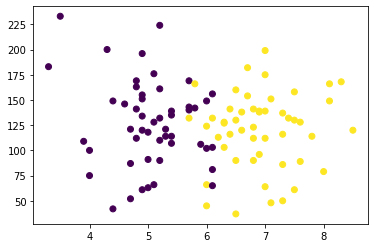

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
91,7.5,158.0
56,6.1,65.0
83,7.5,130.0
78,6.1,81.0
57,6.5,130.0
...,...,...
94,4.7,52.0
52,7.0,175.0
27,6.0,124.0
8,6.1,156.0


In [18]:
y_train

91    1
56    0
83    1
78    0
57    1
     ..
94    0
52    1
27    1
8     0
50    0
Name: placement, Length: 90, dtype: int64

In [19]:
X_test

,cgpa,iq
19,5.2,132.0
1,5.9,106.0
87,5.7,132.0
33,6.0,149.0
98,6.3,103.0
66,6.9,96.0
55,7.8,114.0
69,8.5,120.0
38,6.5,160.0
67,5.0,118.0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_train

array([[ 1.36217764,  0.82995673],
       [ 0.13358507, -1.41672434],
       [ 1.36217764,  0.15353663],
       [ 0.13358507, -1.03019856],
       [ 0.48461151,  0.15353663],
       [ 0.30909829,  0.08106304],
       [-1.70930379, -0.5711992 ],
       [-0.74398106,  1.26479823],
       [ 0.13358507, -0.49872562],
       [ 1.8009607 , -1.07851428],
       [ 1.36217764, -1.51335578],
       [-0.83173767, -1.46504006],
       [-0.65622444, -0.32962059],
       [-1.35827734,  0.61253599],
       [-1.70930379, -1.17514573],
       [ 0.3968549 ,  0.4192731 ],
       [-0.65622444,  0.90243032],
       [ 1.18666441, -1.77909225],
       [-0.91949428,  0.66085171],
       [ 0.83563796,  0.34679952],
       [-0.91949428, -1.51335578],
       [ 0.74788135, -0.0155684 ],
       [ 0.48461151, -0.81277781],
       [-1.7970604 , -0.35377845],
       [ 0.04582845, -1.39256647],
       [-0.91949428,  1.74795545],
       [ 0.66012474,  0.73332529],
       [ 1.27442102,  0.20185235],
       [-0.21744138,

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[-0.65622444,  0.20185235],
       [-0.04192816, -0.42625204],
       [-0.21744138,  0.20185235],
       [ 0.04582845,  0.61253599],
       [ 0.30909829, -0.49872562],
       [ 0.83563796, -0.66783065],
       [ 1.62544747, -0.23298915],
       [ 2.23974376, -0.08804198],
       [ 0.48461151,  0.87827246],
       [-0.83173767, -0.1363577 ]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_test

19    0
1     0
87    1
33    0
98    1
66    1
55    1
69    1
38    1
67    0
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9

In [33]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

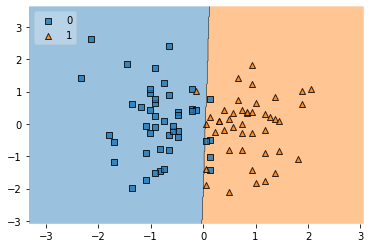

In [34]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [35]:
import pickle

In [36]:
pickle.dump(clf,open('model1.pkl','wb'))